# Drum Corps International Data Analysis


In [2]:
# Drum Corps International (DCI) is a non profit organization that hosts a series of competitions for junior drum corps. 
# This project will analyze the scores of the top drum corps from 2013 to 2023. The data was collected from the DCI website. 

# 0.0 Imports

## 0.1 Libraries and Packages

In [3]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500, 'display.max_rows', 50)

## 0.2 Data

In [4]:
filepath = '../Data/DCI Dataset/'

# Drum Corps International (DCI) datasets
scores_2013_to_2019 = os.path.join(filepath, '2013-to-2019-World-Class-DCI-scores.csv')
scores_2022 = os.path.join(filepath, '2023-World-Class-DCI-scores.csv')
scores_2023 = os.path.join(filepath, '2023-World-Class-DCI-scores.csv')
captions_2023 = os.path.join(filepath, '2023-DCI-Caption-Score-Recaps-Large.csv')


In [5]:
scores_2013_to_2019 = pd.read_csv(scores_2013_to_2019)
scores_2022 = pd.read_csv(scores_2022)
scores_2023 = pd.read_csv(scores_2023)

captions_2023 = pd.read_csv(captions_2023)


# 1.0 Exploratory Data Analysis (EDA)

In [6]:
#concatenate scores_2013_to_2019, scores_2022, and scores_2023 into one dataframe

df = pd.concat([scores_2013_to_2019,
                scores_2022,
                scores_2023])

In [7]:
# Checking the column names
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Date', 'Location', 'Rank', 'Score', 'Corps'], dtype='object')


In [8]:
# Checking unique values in a specific column
column_name = 'Corps'  # Replace with your column name
unique_values = df[column_name].unique()
print(f"\nUnique values in '{column_name}':")
print(unique_values)


Unique values in 'Corps':
['The Cadets' 'Phantom Regiment' 'Madison Scouts' 'Blue Stars'
 'Carolina Crown' 'Blue Devils' 'Blue Knights' 'Pacific Crest' 'Mandarins'
 'Bluecoats' 'The Cavaliers' 'Spirit of Atlanta' 'Crossmen' 'Troopers'
 'Boston Crusaders' 'Jersey Surf' 'Colts' 'Seattle Cascades' 'The Academy'
 'Music City' 'Genesis']


In [9]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# set index to Date column
df.set_index('Date', inplace=True)

In [10]:
# get date of final championship performance each year
finals_df = pd.DataFrame()
finals_dates = []

for i in df.index.year.unique():
    max_date = df.loc[df.index.year == i].index.max() # get the most recent date in the data set
    finals_rows = df[df.index == max_date]  # get the rows for the most recent date
    finals_df = pd.concat([finals_df, finals_rows]) # add the rows to the finals_df
    finals_dates.append(max_date) # add the date to the finals_dates list

In [11]:
# see the champions of each year and their finals score
finals_df[finals_df['Rank'] == '1st']

,Location,Rank,Score,Corps
Date,,,,
2013-08-10,"Indianapolis, IN",1st,98.300,Carolina Crown
2014-08-09,"Indianapolis, IN",1st,99.650,Blue Devils
2015-08-08,"Indianapolis, IN",1st,97.650,Blue Devils
2016-08-13,"Indianapolis, IN",1st,97.650,Bluecoats
2017-08-12,"Indianapolis, IN",1st,98.538,Blue Devils
2019-08-10,"Indianapolis, IN",1st,98.325,Blue Devils
2023-08-12,"Indianapolis, IN",1st,98.975,Blue Devils
2023-08-12,"Indianapolis, IN",1st,98.975,Blue Devils


In [28]:
#show average DCI World Championships Final Scores
df[df['Location'] == "Indianapolis, IN"].groupby('Corps').Score.median().sort_values(ascending=False)

Corps
Blue Devils          97.6880
Bluecoats            96.6380
Carolina Crown       96.5630
The Cadets           93.4750
Boston Crusaders     92.9125
The Cavaliers        92.1250
Blue Knights         90.4000
Phantom Regiment     89.9630
Blue Stars           88.9750
Mandarins            87.4625
Crossmen             86.3380
Madison Scouts       85.6880
Colts                84.1750
Spirit of Atlanta    83.6250
Troopers             83.6000
The Academy          82.5880
Pacific Crest        79.3375
Music City           76.5880
Jersey Surf          75.4880
Genesis              75.2875
Seattle Cascades     73.8125
Name: Score, dtype: float64

In [13]:
top_corps = ['The Cadets', 'Phantom Regiment','Carolina Crown', 'Blue Devils', 'Bluecoats', 'The Cavaliers', 'Boston Crusaders']

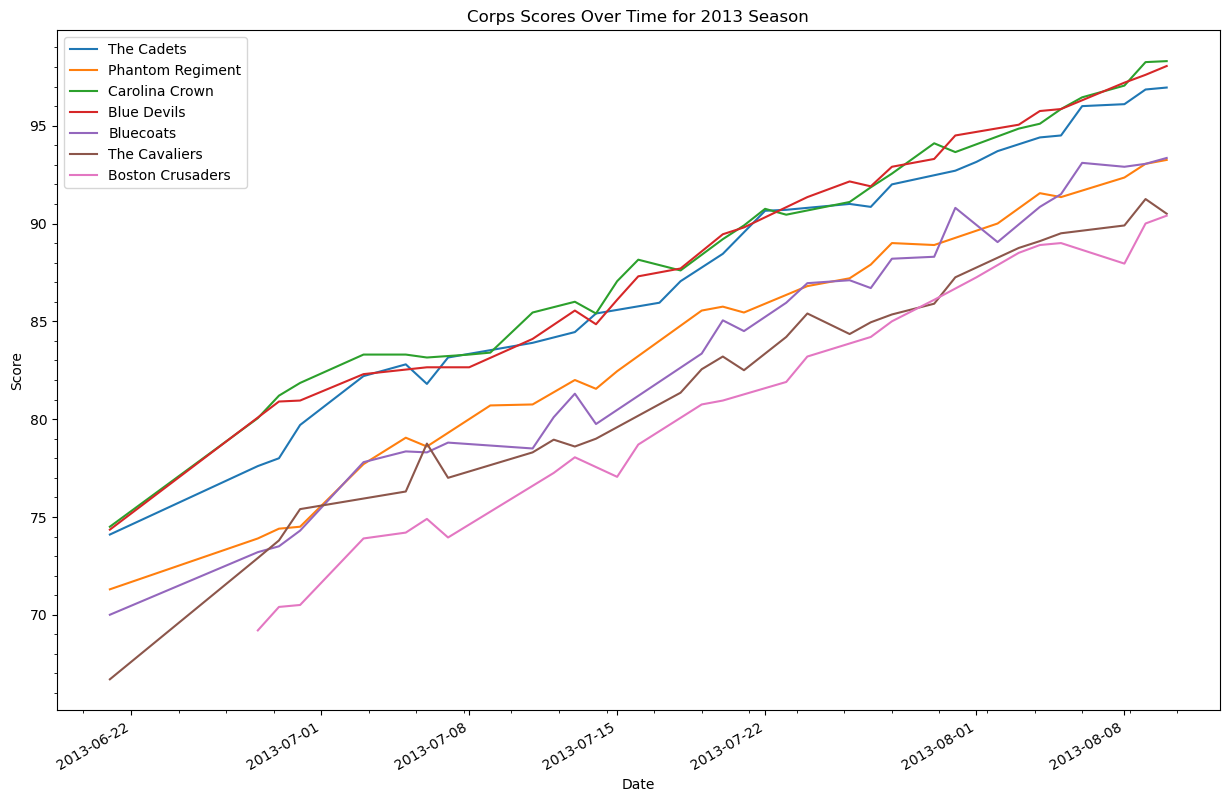

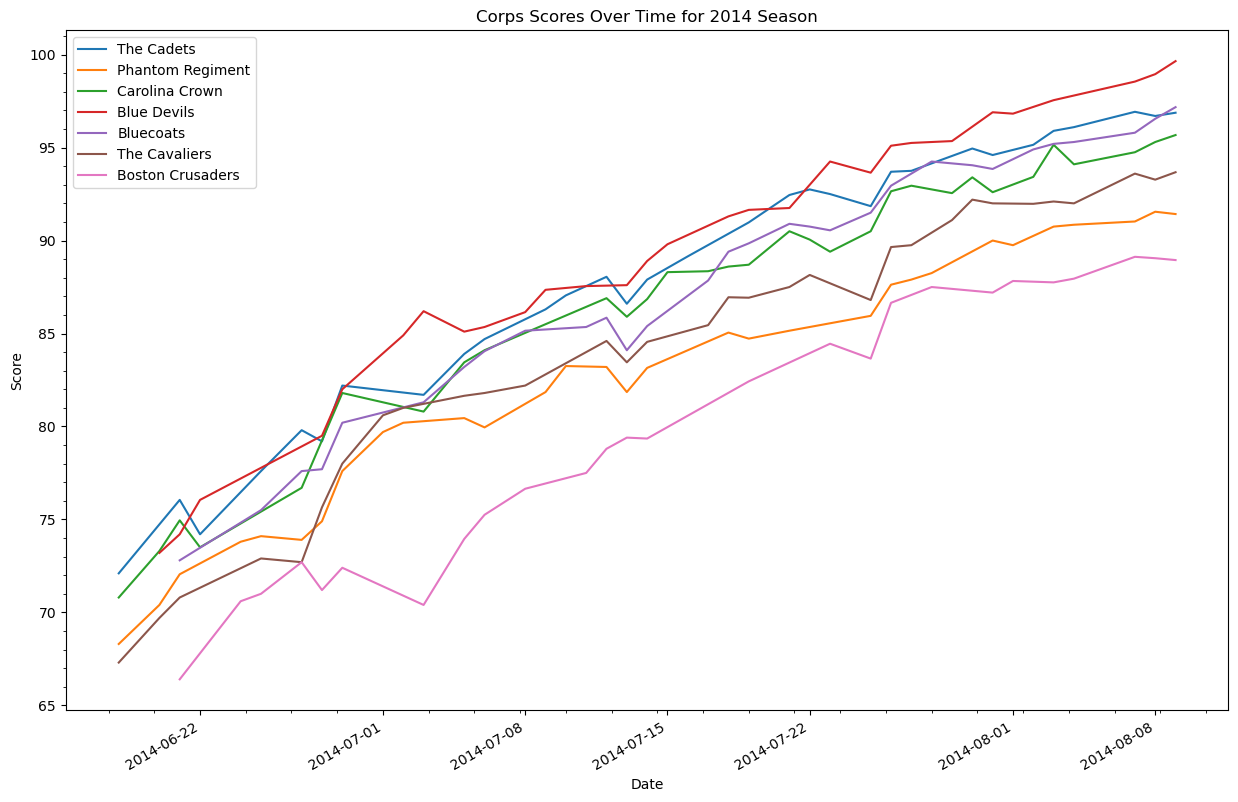

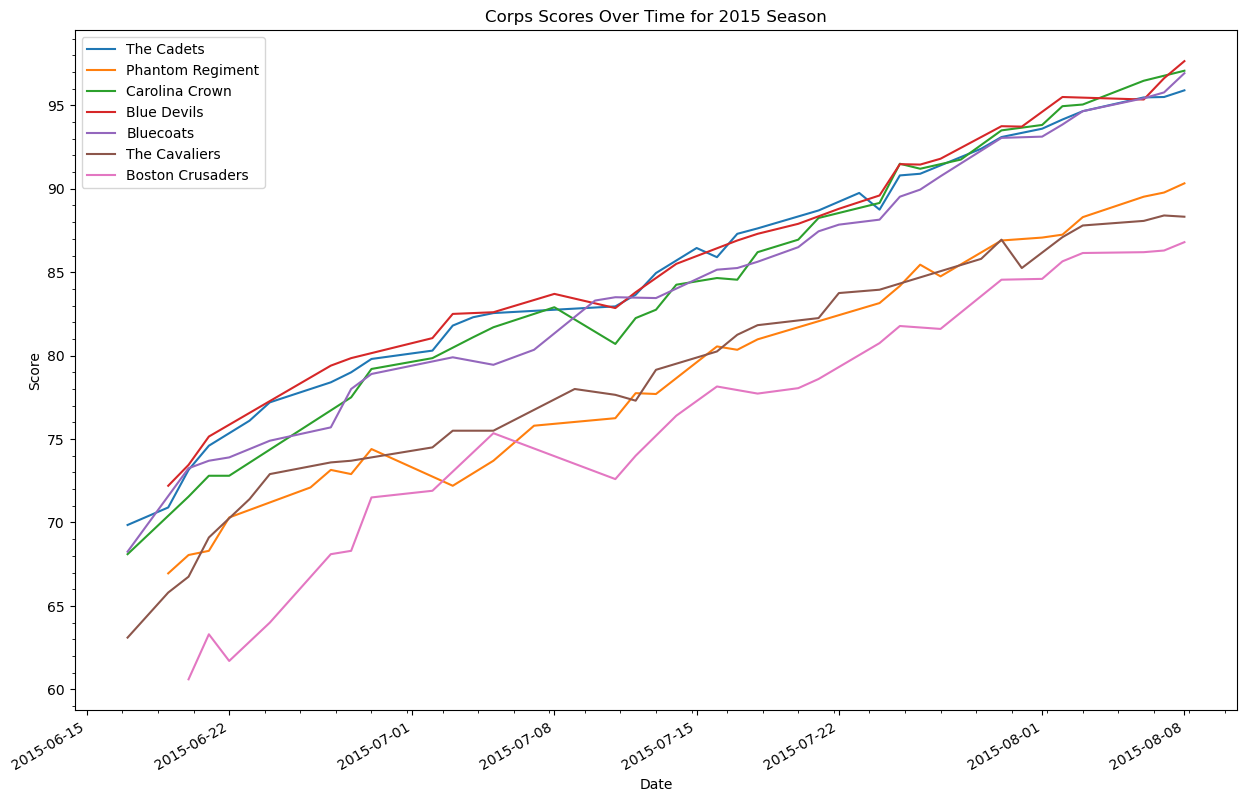

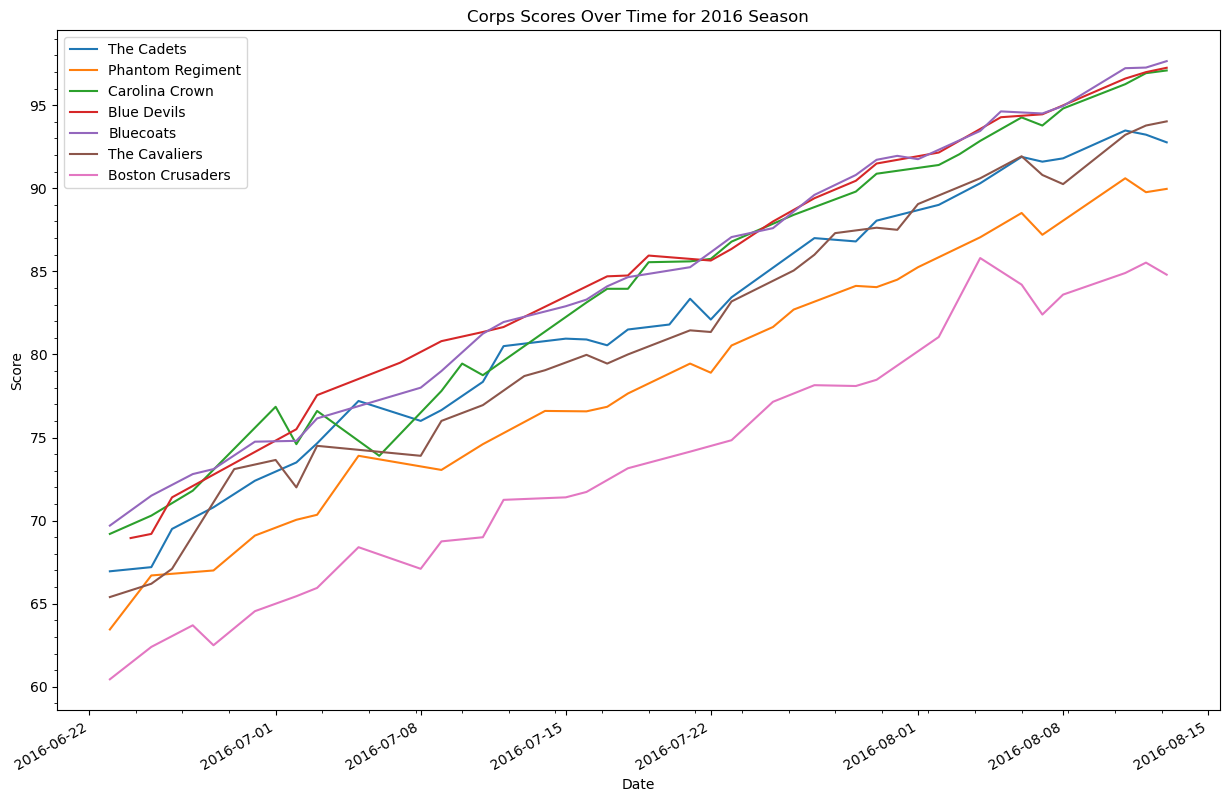

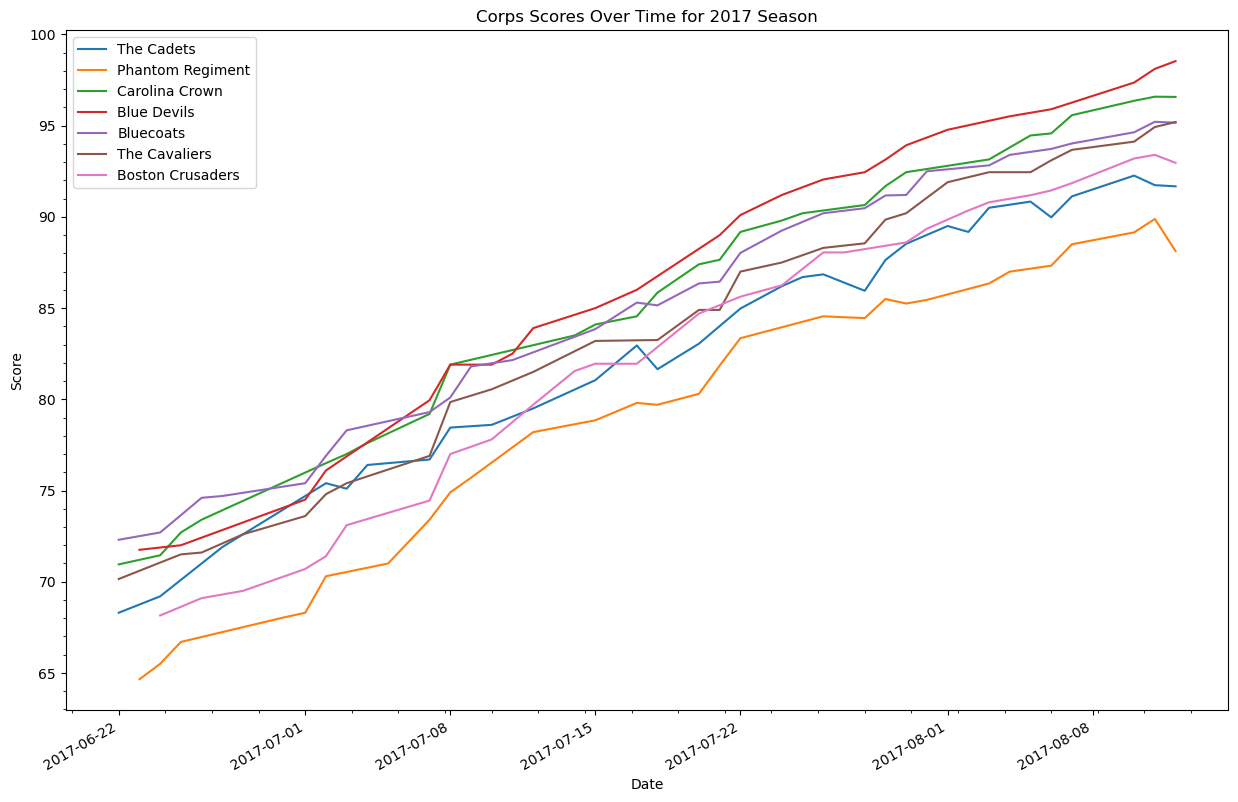

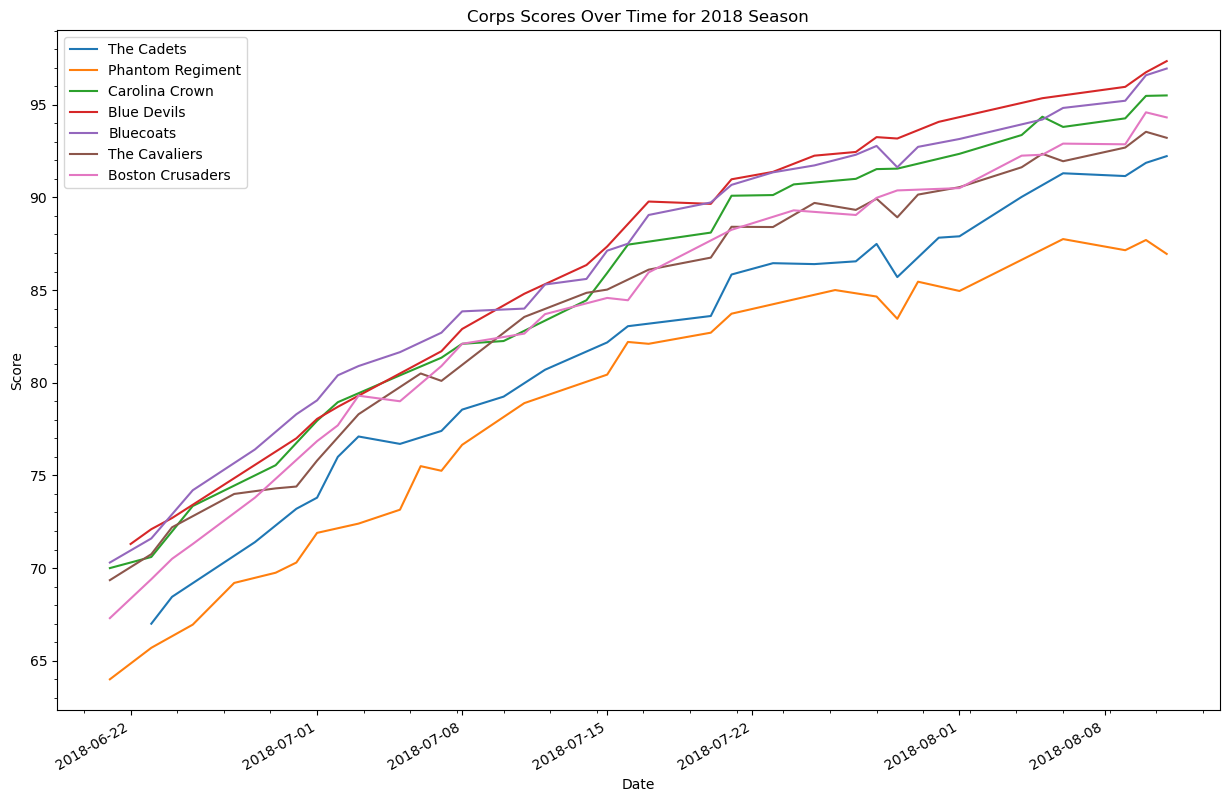

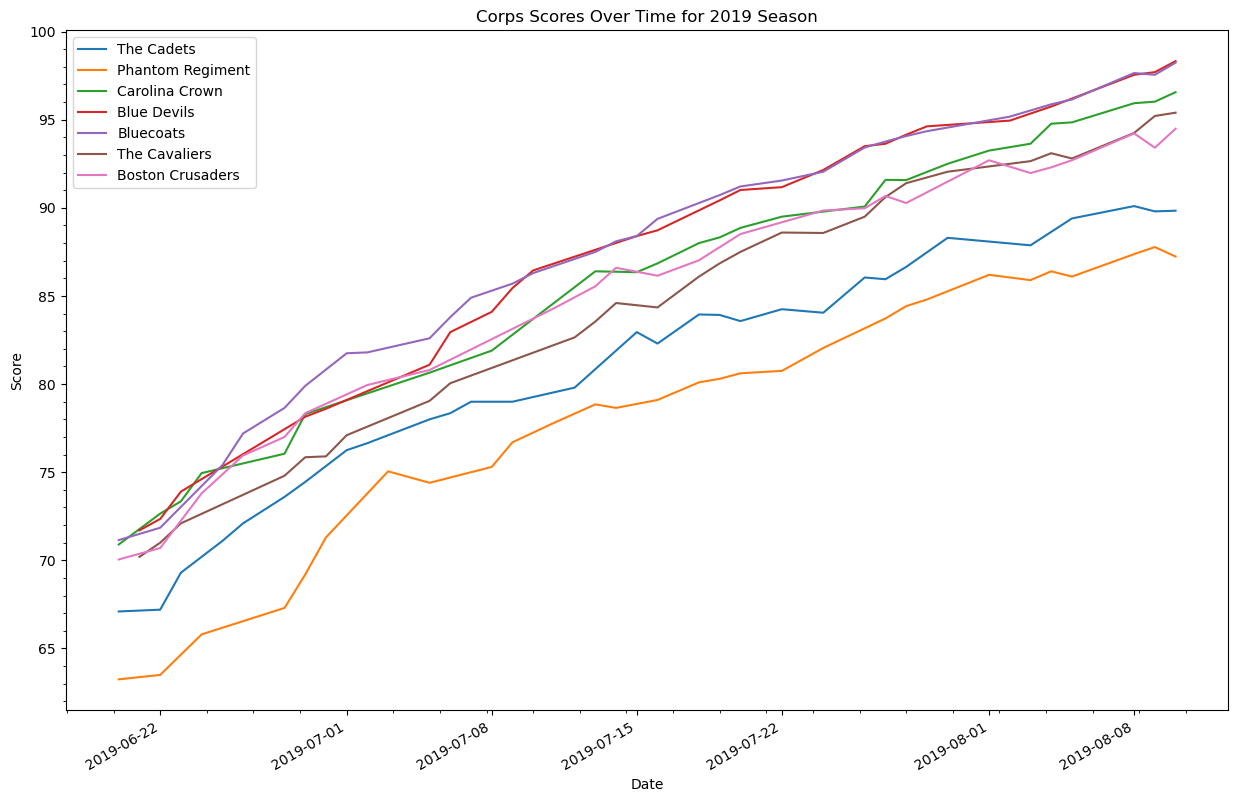

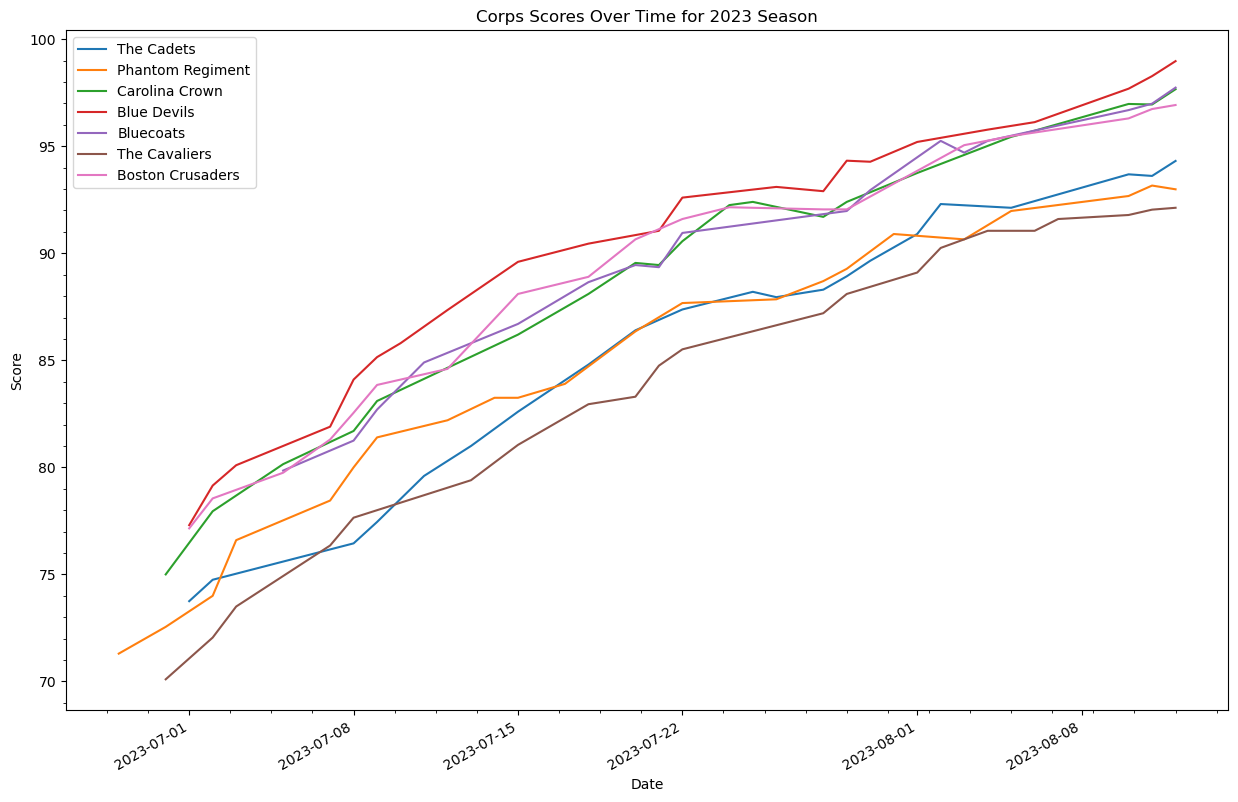

In [14]:
for i in df.index.year.unique():
    #plot each corps' score over time for datetime indexyear of 2023
    df2 = df[df.index.year == i]

    #plot scores over time with all corps on one plot with Corps as legend
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_xlabel('Date')
    ax.set_ylabel('Score')
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='2', color='red')
    ax.set_title(f'Corps Scores Over Time for {i} Season')
    
    for corps in top_corps:
        df2[df2['Corps'] == corps]['Score'].plot(ax=ax, label=corps)

    ax.legend()
    plt.show()

# 2.0 Percussion Scoring

In [15]:
captions_2023.sort_values(by=['music_percussion_score'], ascending=False).head(10)

,date,location,event_name,drum_corps,general_effect1_judge,general_effect2_judge,visual_proficiency_judge,visual_analysis_judge,visual_color_guard_judge,music_brass_judge,music_analysis_judge,music_percussion_judge,general_effect1a_score,general_effect1b_score,general_effect2a_score,general_effect2b_score,general_effect_total_score,visual_proficiency_score,visual_analysis_score,visual_color_guard_score,visual_total_score,music_brass_score,music_analysis1_score,music_analysis2_score,music_percussion_score,music_total_score,total_score
88,2023-08-11,"Indianapolis, IN",DCI World Championship Semifinals,The Cavaliers,Llacer/Rickart,Fugett/McGahey,Michael Turner,Tim Pierce,Damon Padilla,Paul McGarr,Harper/Webb,Chris Rapacki,18.2,18.5,18.20,18.40,36.650,18.50,18.15,17.80,27.225,18.10,18.65,18.40,19.70,28.163,92.038
67,2023-08-10,"Indianapolis, IN",DCI World Championship Prelims,The Cavaliers,Chumley/Miller,Rhodes/Carbone,Hieu Nguyen,Travis Wingate,Robert Solomon,Bryan Crisp,Rios/Romanowski,Jeff Brooks,17.9,17.9,18.35,18.30,36.225,18.20,18.30,18.15,27.325,18.25,18.55,18.50,19.70,28.238,91.788
100,2023-08-12,"Indianapolis, IN",DCI World Championship Finals,The Cavaliers,Howell/Wemhoff,Jones/Davis,Jim Sturgeon,Tom Slaughter,Beverly Brahan,Mark Hoskins,Young/Kennedy,Julie Davila,18.2,18.2,18.15,18.10,36.325,18.30,18.00,18.50,27.400,18.40,18.40,19.20,19.60,28.400,92.125
73,2023-08-10,"Indianapolis, IN",DCI World Championship Prelims,Boston Crusaders,Chumley/Miller,Rhodes/Carbone,Hieu Nguyen,Travis Wingate,Robert Solomon,Bryan Crisp,Rios/Romanowski,Jeff Brooks,19.1,19.1,19.30,19.35,38.425,19.50,19.20,19.40,29.050,18.90,19.30,19.10,19.55,28.825,96.300
74,2023-08-10,"Indianapolis, IN",DCI World Championship Prelims,Blue Devils,Chumley/Miller,Rhodes/Carbone,Hieu Nguyen,Travis Wingate,Robert Solomon,Bryan Crisp,Rios/Romanowski,Jeff Brooks,19.5,19.6,19.70,19.45,39.125,19.80,19.60,19.50,29.450,19.20,19.65,19.40,19.50,29.113,97.688
92,2023-08-11,"Indianapolis, IN",DCI World Championship Semifinals,Boston Crusaders,Llacer/Rickart,Fugett/McGahey,Michael Turner,Tim Pierce,Damon Padilla,Paul McGarr,Harper/Webb,Chris Rapacki,19.2,19.5,19.15,19.35,38.600,19.60,19.10,19.30,29.000,19.60,19.15,19.20,19.50,29.138,96.738
107,2023-08-12,"Indianapolis, IN",DCI World Championship Finals,Blue Devils,Howell/Wemhoff,Jones/Davis,Jim Sturgeon,Tom Slaughter,Beverly Brahan,Mark Hoskins,Young/Kennedy,Julie Davila,19.6,20.0,19.80,19.95,39.675,20.00,19.75,19.90,29.825,19.80,19.80,19.70,19.40,29.475,98.975
93,2023-08-11,"Indianapolis, IN",DCI World Championship Semifinals,Bluecoats,Llacer/Rickart,Fugett/McGahey,Michael Turner,Tim Pierce,Damon Padilla,Paul McGarr,Harper/Webb,Chris Rapacki,19.5,19.7,19.35,19.20,38.875,19.20,19.60,19.20,29.000,19.50,19.40,19.25,19.40,29.113,96.988
68,2023-08-10,"Indianapolis, IN",DCI World Championship Prelims,The Cadets,Chumley/Miller,Rhodes/Carbone,Hieu Nguyen,Travis Wingate,Robert Solomon,Bryan Crisp,Rios/Romanowski,Jeff Brooks,18.8,19.0,18.80,18.70,37.650,18.25,18.80,18.30,27.675,18.60,18.75,18.80,19.35,28.363,93.688
105,2023-08-12,"Indianapolis, IN",DCI World Championship Finals,Carolina Crown,Howell/Wemhoff,Jones/Davis,Jim Sturgeon,Tom Slaughter,Beverly Brahan,Mark Hoskins,Young/Kennedy,Julie Davila,19.7,19.3,19.50,19.70,39.100,19.50,19.40,19.30,29.100,19.90,19.70,19.75,19.30,29.463,97.663


In [16]:
captions_2023.columns

Index(['date', 'location', 'event_name', 'drum_corps', 'general_effect1_judge',
       'general_effect2_judge', 'visual_proficiency_judge',
       'visual_analysis_judge', 'visual_color_guard_judge',
       'music_brass_judge', 'music_analysis_judge', 'music_percussion_judge',
       'general_effect1a_score', 'general_effect1b_score',
       'general_effect2a_score', 'general_effect2b_score',
       'general_effect_total_score', 'visual_proficiency_score',
       'visual_analysis_score', 'visual_color_guard_score',
       'visual_total_score', 'music_brass_score', 'music_analysis1_score',
       'music_analysis2_score', 'music_percussion_score', 'music_total_score',
       'total_score'],
      dtype='object')

In [21]:
percussion_2023 = captions_2023[['date', 'location', 'event_name', 'drum_corps','music_percussion_judge','music_percussion_score']].sort_values(by = 'date')
# convert Date column to datetime
percussion_2023['date'] = pd.to_datetime(percussion_2023['date'])

# set index to Date column
percussion_2023.set_index('date', inplace=True)

In [24]:
percussion_2023 = percussion_2023.query('location == "Indianapolis, IN"')

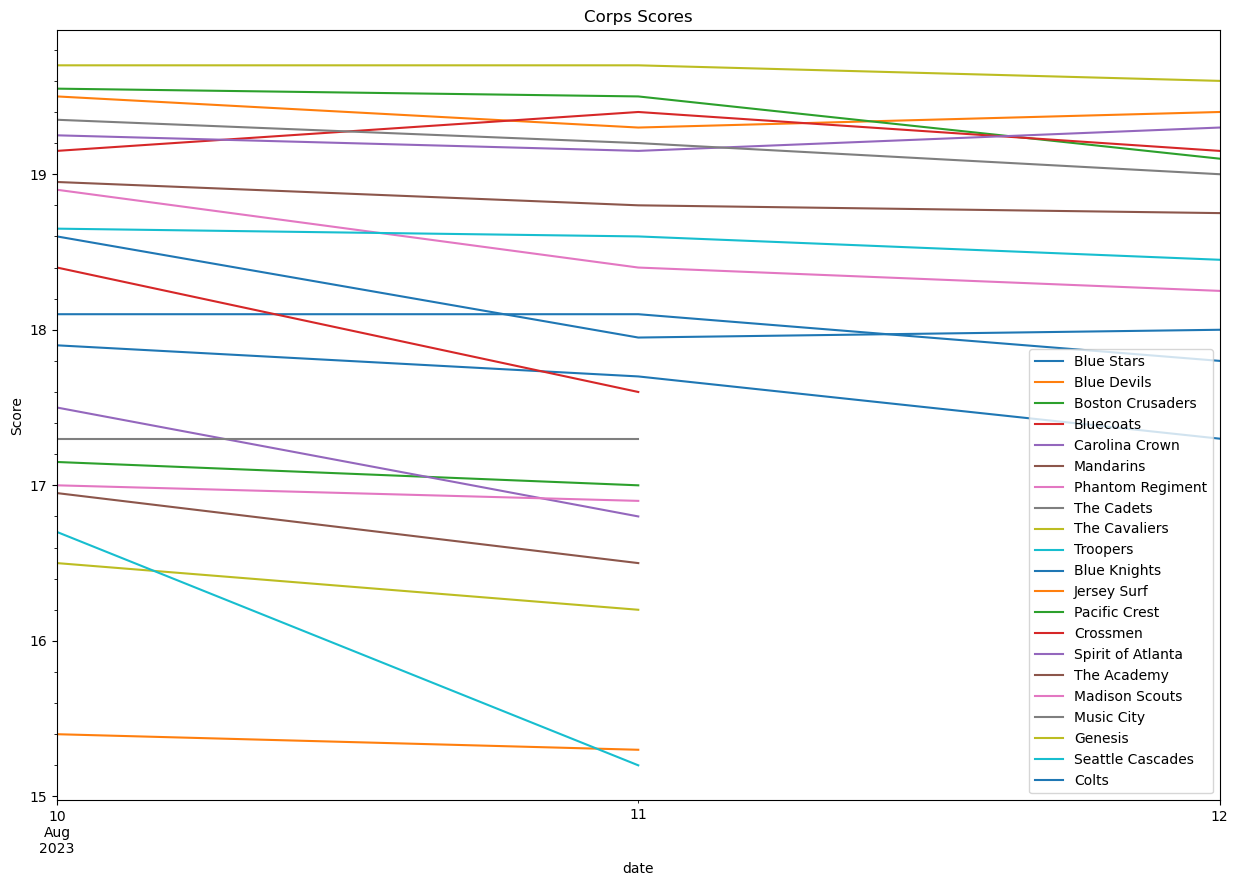

In [25]:
    #plot scores over time with all corps on one plot with Corps as legend
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_xlabel('Date')
    ax.set_ylabel('Score')
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='2', color='red')
    ax.set_title(f'Corps Scores')
    
    for corps in percussion_2023.drum_corps.unique():
        percussion_2023[percussion_2023['drum_corps'] == corps]['music_percussion_score'].plot(ax=ax, label=corps)

    ax.legend()
    plt.show()